In [1]:
import pytesseract
import cv2
import time
import HelperFunc
from selenium import webdriver
import matplotlib.pyplot as plt

In [2]:
driver = webdriver.Firefox()
driver.get("https://logigames.bet9ja.com/games.ls?page=launch&gameid=18000&skin=12&sid=&pff=1&tmp=1611946195")
time.sleep(5)

In [3]:
GAME_CANVAS = "layer2"
game_img = HelperFunc.getGameImage(driver, GAME_CANVAS)

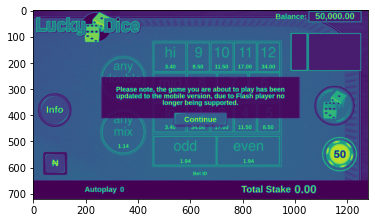

In [4]:
plt.imshow(game_img)

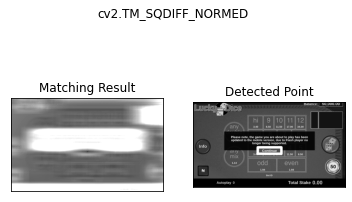

Action Performed!


In [5]:
tmp =  HelperFunc.getTemplate("continue")
game_image = HelperFunc.getGameImage(driver, GAME_CANVAS)
coord  = HelperFunc.detectTemplate(game_image, tmp, True, -1)
HelperFunc.clickScreen(driver,coord[0] )

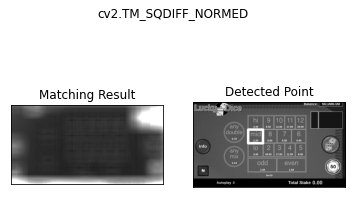

Action Performed!


In [6]:
tmp =  HelperFunc.getTemplate("mid")
game_image = HelperFunc.getGameImage(driver, GAME_CANVAS)
coord  = HelperFunc.detectTemplate(game_image, tmp, True, -1)
HelperFunc.clickScreen(driver,coord[0] )

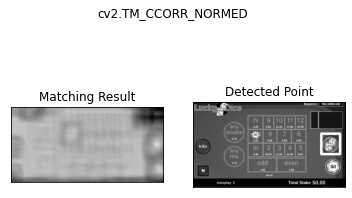

Action Performed!


In [7]:
tmp =  HelperFunc.getTemplate("rebet")
game_image = HelperFunc.getGameImage(driver, GAME_CANVAS)
coord  = HelperFunc.detectTemplate(game_image, tmp, True, 3)
HelperFunc.clickScreen(driver,(coord[0][0] + 50, coord[0][1] + 50) )

In [13]:
game_image = HelperFunc.getGameImage(driver, GAME_CANVAS)

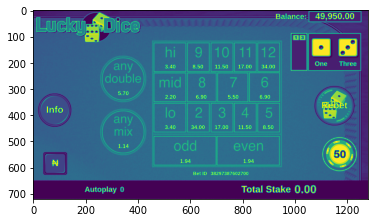

In [14]:
plt.imshow(game_image)

In [15]:
r1 = (1065, 188, 84, 35)
r2  = (1160, 189, 86, 33)

r = cv2.selectROI(game_image)
# Crop image
imCrop = game_image[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]
plt.imshow(imCrop)

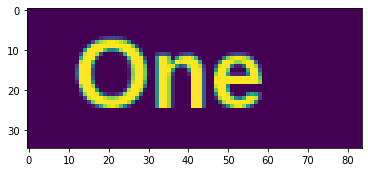

In [16]:
imCrop1 = game_image[int(r1[1]):int(r1[1]+r1[3]), int(r1[0]):int(r1[0]+r1[2])]
plt.imshow(imCrop1)

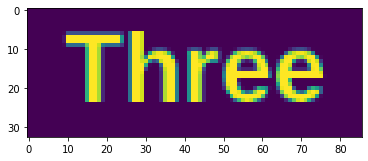

In [17]:
imCrop2 = game_image[int(r2[1]):int(r2[1]+r2[3]), int(r2[0]):int(r2[0]+r2[2])]
plt.imshow(imCrop2)

In [60]:
import cv2
import numpy as np

img = cv2.imread('image.jpg')

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((2,2),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
def detect_signature(image):
    vis = image.copy()
    mser = cv2.MSER_create()
    regions = mser.detectRegions(image)
    hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions[0]]
    xs = []
    ys = []
    for hull in hulls:
        x,y,w,h = cv2.boundingRect(hull)
        xmin, ymin, xmax, ymax = x,y,x+w,y+h
        xs.append(xmin)
        xs.append(xmax)
        ys.append(ymin)
        ys.append(ymax)
    xmin_ = min(xs)
    xmax_ = max(xs)
    ymin_ = min(ys)
    ymax_ = max(ys)
    xmin_, ymin_, xmax_, ymax_
    roi = image[ymin_:ymax_, xmin_:xmax_]
    return roi

def colorThreshold(img, rbg_threshold = (60,60,60)):
    """
    Return Binary Image which is thresholded by thr rbg pixel vales 
    given in rbg_threshold i.e. If pixel is > thres assign 1
    and if pixel is < thres assing 0
    args:
          img - img to be thresholded
          rbg_threshold - (r,g,b)
    """
    temp = np.zeros(img.shape)
    rflags_h = img[:,:]>rbg_threshold[0]
#     gflags_h = img[:,:,1]>rbg_threshold[1]
#     bflags_h = img[:,:,2]>rbg_threshold[2]
    
    temp[:,:][rflags_h] = 1
#     temp[:,:,1][gflags_h] = 1
#     temp[:,:,2][bflags_h] = 1
    return temp

In [61]:
im1 = dilate(imCrop1)
im2 = dilate(imCrop2)

In [62]:
im1 = colorThreshold(imCrop1)

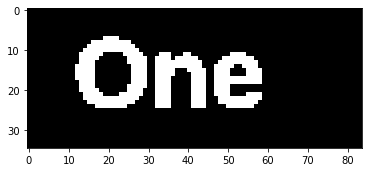

In [63]:
plt.imshow(im1, cmap ='gray')

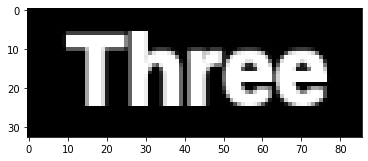

In [32]:
plt.imshow(im2, cmap='gray')

detector = cv2.SimpleBlobDetector()
keypoints = detector.detect(im1)
im_with_keypoints = cv2.drawKeypoints(im1, keypoints, np.array([]),(0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(im_with_keypoints, cmap = 'gray')

detector = cv2.SimpleBlobDetector()
keypoints = detector.detect(im2)
im_with_keypoints = cv2.drawKeypoints(im2, keypoints, np.array([]),(0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(im_with_keypoints, cmap = 'gray')

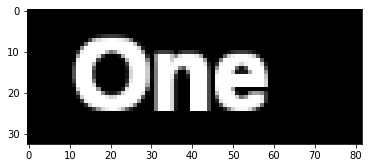

In [33]:
plt.imshow(detect_signature(im1), cmap= 'gray')

#Create MSER object
mser = cv2.MSER_create()
im1 = np.abs(im1 -255)
vis = im1.copy()

#detect regions in gray scale image
regions, _ = mser.detectRegions(im1)

hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]

cv2.polylines(vis, hulls, 1, (0, 255, 0))

plt.imshow(vis, cmap ='gray')



mask = np.zeros((im1.shape[0], im1.shape[1], 1), dtype=np.uint8)

for contour in hulls:

    cv2.drawContours(mask, [contour], -1, (25, 255, 255), -1)

#this is used to find only text regions, remaining are ignored
text_only = cv2.bitwise_and(im1, im1, mask=mask)

#plt.imshow(text_only, cmap ='gray')

In [45]:
#imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(im1, 127, 255, 0)
#im2, contours, hierarchy
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

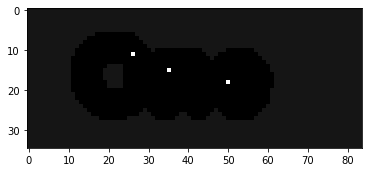

In [52]:
plt.imshow(cv2.drawContours(im1, contours, -1, (0,255,0), 3), cmap ='gray')

In [64]:
custom_config = r'--oem 3 --psm 6'
str1 = pytesseract.image_to_string(im2, config=custom_config)

In [65]:
str1

'Bile -t-}\n\x0c'

In [66]:
pytesseract.image_to_string(im1, config=custom_config)

OSError: cannot write mode F as PNG

In [48]:
str(str1)== "Six\n\x0c"

False

In [19]:
driver.close()